In [1]:
# Imports
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from pylightgbm.models import GBMRegressor
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from bayes_opt import BayesianOptimization
import scipy.interpolate
from time import time
import os

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
FOLDS = 4
N_JOBS = 6
SEED = 2016
os.environ["LIGHTGBM_EXEC"] = "C:/Users/Julien/LightGBM/lightgbm.exe"

#DATA = "Base"
#DATA = "Time"
DATA = "Medians"
#DATA = "Lags"


In [2]:
# Get data
train_y1b1 = pd.read_csv("clean_data/train_y1b1_" + DATA + ".csv")
train_y1b2 = pd.read_csv("clean_data/train_y1b2_" + DATA + ".csv")
train_y1b3 = pd.read_csv("clean_data/train_y1b3_" + DATA + ".csv")
train_y1b4 = pd.read_csv("clean_data/train_y1b4_" + DATA + ".csv")

train_y2b1 = pd.read_csv("clean_data/train_y2b1_" + DATA + ".csv")
train_y2b2 = pd.read_csv("clean_data/train_y2b2_" + DATA + ".csv")
train_y2b4 = pd.read_csv("clean_data/train_y2b4_" + DATA + ".csv")

train_y3b3 = pd.read_csv("clean_data/train_y3b3_" + DATA + ".csv")

train_y4b1 = pd.read_csv("clean_data/train_y4b1_" + DATA + ".csv")
train_y4b2 = pd.read_csv("clean_data/train_y4b2_" + DATA + ".csv")
train_y4b4 = pd.read_csv("clean_data/train_y4b4_" + DATA + ".csv")

train_y5b1 = pd.read_csv("clean_data/train_y5b1_" + DATA + ".csv")
train_y5b2 = pd.read_csv("clean_data/train_y5b2_" + DATA + ".csv")
train_y5b3 = pd.read_csv("clean_data/train_y5b3_" + DATA + ".csv")
train_y5b4 = pd.read_csv("clean_data/train_y5b4_" + DATA + ".csv")
###
X_train_y1b1 = pd.read_csv("clean_data/X_train_y1b1_" + DATA + ".csv")
X_train_y1b2 = pd.read_csv("clean_data/X_train_y1b2_" + DATA + ".csv")
X_train_y1b3 = pd.read_csv("clean_data/X_train_y1b3_" + DATA + ".csv")
X_train_y1b4 = pd.read_csv("clean_data/X_train_y1b4_" + DATA + ".csv")

X_train_y2b1 = pd.read_csv("clean_data/X_train_y2b1_" + DATA + ".csv")
X_train_y2b2 = pd.read_csv("clean_data/X_train_y2b2_" + DATA + ".csv")
X_train_y2b4 = pd.read_csv("clean_data/X_train_y2b4_" + DATA + ".csv")

X_train_y3b3 = pd.read_csv("clean_data/X_train_y3b3_" + DATA + ".csv")

X_train_y4b1 = pd.read_csv("clean_data/X_train_y4b1_" + DATA + ".csv")
X_train_y4b2 = pd.read_csv("clean_data/X_train_y4b2_" + DATA + ".csv")
X_train_y4b4 = pd.read_csv("clean_data/X_train_y4b4_" + DATA + ".csv")

X_train_y5b1 = pd.read_csv("clean_data/X_train_y5b1_" + DATA + ".csv")
X_train_y5b2 = pd.read_csv("clean_data/X_train_y5b2_" + DATA + ".csv")
X_train_y5b3 = pd.read_csv("clean_data/X_train_y5b3_" + DATA + ".csv")
X_train_y5b4 = pd.read_csv("clean_data/X_train_y5b4_" + DATA + ".csv")
###
X_trainVal_y1b1 = pd.read_csv("clean_data/X_trainVal_y1b1_" + DATA + ".csv")
X_trainVal_y1b2 = pd.read_csv("clean_data/X_trainVal_y1b2_" + DATA + ".csv")
X_trainVal_y1b3 = pd.read_csv("clean_data/X_trainVal_y1b3_" + DATA + ".csv")
X_trainVal_y1b4 = pd.read_csv("clean_data/X_trainVal_y1b4_" + DATA + ".csv")

X_trainVal_y2b1 = pd.read_csv("clean_data/X_trainVal_y2b1_" + DATA + ".csv")
X_trainVal_y2b2 = pd.read_csv("clean_data/X_trainVal_y2b2_" + DATA + ".csv")
X_trainVal_y2b4 = pd.read_csv("clean_data/X_trainVal_y2b4_" + DATA + ".csv")

X_trainVal_y3b3 = pd.read_csv("clean_data/X_trainVal_y3b3_" + DATA + ".csv")

X_trainVal_y4b1 = pd.read_csv("clean_data/X_trainVal_y4b1_" + DATA + ".csv")
X_trainVal_y4b2 = pd.read_csv("clean_data/X_trainVal_y4b2_" + DATA + ".csv")
X_trainVal_y4b4 = pd.read_csv("clean_data/X_trainVal_y4b4_" + DATA + ".csv")

X_trainVal_y5b1 = pd.read_csv("clean_data/X_trainVal_y5b1_" + DATA + ".csv")
X_trainVal_y5b2 = pd.read_csv("clean_data/X_trainVal_y5b2_" + DATA + ".csv")
X_trainVal_y5b3 = pd.read_csv("clean_data/X_trainVal_y5b3_" + DATA + ".csv")
X_trainVal_y5b4 = pd.read_csv("clean_data/X_trainVal_y5b4_" + DATA + ".csv")
###
'''test = pd.read_csv("clean_data/test_" + DATA + ".csv")'''
test_y1b1 = pd.read_csv("clean_data/test_y1b1_" + DATA + ".csv")
test_y1b2 = pd.read_csv("clean_data/test_y1b2_" + DATA + ".csv")
test_y1b3 = pd.read_csv("clean_data/test_y1b3_" + DATA + ".csv")
test_y1b4 = pd.read_csv("clean_data/test_y1b4_" + DATA + ".csv")

test_y2b1 = pd.read_csv("clean_data/test_y2b1_" + DATA + ".csv")
test_y2b2 = pd.read_csv("clean_data/test_y2b2_" + DATA + ".csv")
test_y2b4 = pd.read_csv("clean_data/test_y2b4_" + DATA + ".csv")

test_y3b3 = pd.read_csv("clean_data/test_y3b3_" + DATA + ".csv")

test_y4b1 = pd.read_csv("clean_data/test_y4b1_" + DATA + ".csv")
test_y4b2 = pd.read_csv("clean_data/test_y4b2_" + DATA + ".csv")
test_y4b4 = pd.read_csv("clean_data/test_y4b4_" + DATA + ".csv")

test_y5b1 = pd.read_csv("clean_data/test_y5b1_" + DATA + ".csv")
test_y5b2 = pd.read_csv("clean_data/test_y5b2_" + DATA + ".csv")
test_y5b3 = pd.read_csv("clean_data/test_y5b3_" + DATA + ".csv")
test_y5b4 = pd.read_csv("clean_data/test_y5b4_" + DATA + ".csv")
###
X_test_y1b1 = pd.read_csv("clean_data/X_test_y1b1_" + DATA + ".csv")
X_test_y1b2 = pd.read_csv("clean_data/X_test_y1b2_" + DATA + ".csv")
X_test_y1b3 = pd.read_csv("clean_data/X_test_y1b3_" + DATA + ".csv")
X_test_y1b4 = pd.read_csv("clean_data/X_test_y1b4_" + DATA + ".csv")

X_test_y2b1 = pd.read_csv("clean_data/X_test_y2b1_" + DATA + ".csv")
X_test_y2b2 = pd.read_csv("clean_data/X_test_y2b2_" + DATA + ".csv")
X_test_y2b4 = pd.read_csv("clean_data/X_test_y2b4_" + DATA + ".csv")

X_test_y3b3 = pd.read_csv("clean_data/X_test_y3b3_" + DATA + ".csv")

X_test_y4b1 = pd.read_csv("clean_data/X_test_y4b1_" + DATA + ".csv")
X_test_y4b2 = pd.read_csv("clean_data/X_test_y4b2_" + DATA + ".csv")
X_test_y4b4 = pd.read_csv("clean_data/X_test_y4b4_" + DATA + ".csv")

X_test_y5b1 = pd.read_csv("clean_data/X_test_y5b1_" + DATA + ".csv")
X_test_y5b2 = pd.read_csv("clean_data/X_test_y5b2_" + DATA + ".csv")
X_test_y5b3 = pd.read_csv("clean_data/X_test_y5b3_" + DATA + ".csv")
X_test_y5b4 = pd.read_csv("clean_data/X_test_y5b4_" + DATA + ".csv")
###
X_testVal_y1b1 = pd.read_csv("clean_data/X_testVal_y1b1_" + DATA + ".csv")
X_testVal_y1b2 = pd.read_csv("clean_data/X_testVal_y1b2_" + DATA + ".csv")
X_testVal_y1b3 = pd.read_csv("clean_data/X_testVal_y1b3_" + DATA + ".csv")
X_testVal_y1b4 = pd.read_csv("clean_data/X_testVal_y1b4_" + DATA + ".csv")

X_testVal_y2b1 = pd.read_csv("clean_data/X_testVal_y2b1_" + DATA + ".csv")
X_testVal_y2b2 = pd.read_csv("clean_data/X_testVal_y2b2_" + DATA + ".csv")
X_testVal_y2b4 = pd.read_csv("clean_data/X_testVal_y2b4_" + DATA + ".csv")

X_testVal_y3b3 = pd.read_csv("clean_data/X_testVal_y3b3_" + DATA + ".csv")

X_testVal_y4b1 = pd.read_csv("clean_data/X_testVal_y4b1_" + DATA + ".csv")
X_testVal_y4b2 = pd.read_csv("clean_data/X_testVal_y4b2_" + DATA + ".csv")
X_testVal_y4b4 = pd.read_csv("clean_data/X_testVal_y4b4_" + DATA + ".csv")

X_testVal_y5b1 = pd.read_csv("clean_data/X_testVal_y5b1_" + DATA + ".csv")
X_testVal_y5b2 = pd.read_csv("clean_data/X_testVal_y5b2_" + DATA + ".csv")
X_testVal_y5b3 = pd.read_csv("clean_data/X_testVal_y5b3_" + DATA + ".csv")
X_testVal_y5b4 = pd.read_csv("clean_data/X_testVal_y5b4_" + DATA + ".csv")
###
y_y1b1 = pd.read_csv("clean_data/y_y1b1.csv")
y_y1b2 = pd.read_csv("clean_data/y_y1b2.csv")
y_y1b3 = pd.read_csv("clean_data/y_y1b3.csv")
y_y1b4 = pd.read_csv("clean_data/y_y1b4.csv")

y_y2b1 = pd.read_csv("clean_data/y_y2b1.csv")
y_y2b2 = pd.read_csv("clean_data/y_y2b2.csv")
y_y2b4 = pd.read_csv("clean_data/y_y2b4.csv")

y_y3b3 = pd.read_csv("clean_data/y_y3b3.csv")

y_y4b1 = pd.read_csv("clean_data/y_y4b1.csv")
y_y4b2 = pd.read_csv("clean_data/y_y4b2.csv")
y_y4b4 = pd.read_csv("clean_data/y_y4b4.csv")

y_y5b1 = pd.read_csv("clean_data/y_y5b1.csv")
y_y5b2 = pd.read_csv("clean_data/y_y5b2.csv")
y_y5b3 = pd.read_csv("clean_data/y_y5b3.csv")
y_y5b4 = pd.read_csv("clean_data/y_y5b4.csv")
###
y_train_y1b1 = pd.read_csv("clean_data/y_train_y1b1.csv")
y_train_y1b2 = pd.read_csv("clean_data/y_train_y1b2.csv")
y_train_y1b3 = pd.read_csv("clean_data/y_train_y1b3.csv")
y_train_y1b4 = pd.read_csv("clean_data/y_train_y1b4.csv")

y_train_y2b1 = pd.read_csv("clean_data/y_train_y2b1.csv")
y_train_y2b2 = pd.read_csv("clean_data/y_train_y2b2.csv")
y_train_y2b4 = pd.read_csv("clean_data/y_train_y2b4.csv")

y_train_y3b3 = pd.read_csv("clean_data/y_train_y3b3.csv")

y_train_y4b1 = pd.read_csv("clean_data/y_train_y4b1.csv")
y_train_y4b2 = pd.read_csv("clean_data/y_train_y4b2.csv")
y_train_y4b4 = pd.read_csv("clean_data/y_train_y4b4.csv")

y_train_y5b1 = pd.read_csv("clean_data/y_train_y5b1.csv")
y_train_y5b2 = pd.read_csv("clean_data/y_train_y5b2.csv")
y_train_y5b3 = pd.read_csv("clean_data/y_train_y5b3.csv")
y_train_y5b4 = pd.read_csv("clean_data/y_train_y5b4.csv")
###
y_trainVal_y1b1 = pd.read_csv("clean_data/y_trainVal_y1b1.csv")
y_trainVal_y1b2 = pd.read_csv("clean_data/y_trainVal_y1b2.csv")
y_trainVal_y1b3 = pd.read_csv("clean_data/y_trainVal_y1b3.csv")
y_trainVal_y1b4 = pd.read_csv("clean_data/y_trainVal_y1b4.csv")

y_trainVal_y2b1 = pd.read_csv("clean_data/y_trainVal_y2b1.csv")
y_trainVal_y2b2 = pd.read_csv("clean_data/y_trainVal_y2b2.csv")
y_trainVal_y2b4 = pd.read_csv("clean_data/y_trainVal_y2b4.csv")

y_trainVal_y3b3 = pd.read_csv("clean_data/y_trainVal_y3b3.csv")

y_trainVal_y4b1 = pd.read_csv("clean_data/y_trainVal_y4b1.csv")
y_trainVal_y4b2 = pd.read_csv("clean_data/y_trainVal_y4b2.csv")
y_trainVal_y4b4 = pd.read_csv("clean_data/y_trainVal_y4b4.csv")

y_trainVal_y5b1 = pd.read_csv("clean_data/y_trainVal_y5b1.csv")
y_trainVal_y5b2 = pd.read_csv("clean_data/y_trainVal_y5b2.csv")
y_trainVal_y5b3 = pd.read_csv("clean_data/y_trainVal_y5b3.csv")
y_trainVal_y5b4 = pd.read_csv("clean_data/y_trainVal_y5b4.csv")
###
y_test_y1b1 = pd.read_csv("clean_data/y_test_y1b1.csv")
y_test_y1b2 = pd.read_csv("clean_data/y_test_y1b2.csv")
y_test_y1b3 = pd.read_csv("clean_data/y_test_y1b3.csv")
y_test_y1b4 = pd.read_csv("clean_data/y_test_y1b4.csv")

y_test_y2b1 = pd.read_csv("clean_data/y_test_y2b1.csv")
y_test_y2b2 = pd.read_csv("clean_data/y_test_y2b2.csv")
y_test_y2b4 = pd.read_csv("clean_data/y_test_y2b4.csv")

y_test_y3b3 = pd.read_csv("clean_data/y_test_y3b3.csv")

y_test_y4b1 = pd.read_csv("clean_data/y_test_y4b1.csv")
y_test_y4b2 = pd.read_csv("clean_data/y_test_y4b2.csv")
y_test_y4b4 = pd.read_csv("clean_data/y_test_y4b4.csv")

y_test_y5b1 = pd.read_csv("clean_data/y_test_y5b1.csv")
y_test_y5b2 = pd.read_csv("clean_data/y_test_y5b2.csv")
y_test_y5b3 = pd.read_csv("clean_data/y_test_y5b3.csv")
y_test_y5b4 = pd.read_csv("clean_data/y_test_y5b4.csv")
###
y_testVal_y1b1 = pd.read_csv("clean_data/y_testVal_y1b1.csv")
y_testVal_y1b2 = pd.read_csv("clean_data/y_testVal_y1b2.csv")
y_testVal_y1b3 = pd.read_csv("clean_data/y_testVal_y1b3.csv")
y_testVal_y1b4 = pd.read_csv("clean_data/y_testVal_y1b4.csv")

y_testVal_y2b1 = pd.read_csv("clean_data/y_testVal_y2b1.csv")
y_testVal_y2b2 = pd.read_csv("clean_data/y_testVal_y2b2.csv")
y_testVal_y2b4 = pd.read_csv("clean_data/y_testVal_y2b4.csv")

y_testVal_y3b3 = pd.read_csv("clean_data/y_testVal_y3b3.csv")

y_testVal_y4b1 = pd.read_csv("clean_data/y_testVal_y4b1.csv")
y_testVal_y4b2 = pd.read_csv("clean_data/y_testVal_y4b2.csv")
y_testVal_y4b4 = pd.read_csv("clean_data/y_testVal_y4b4.csv")

y_testVal_y5b1 = pd.read_csv("clean_data/y_testVal_y5b1.csv")
y_testVal_y5b2 = pd.read_csv("clean_data/y_testVal_y5b2.csv")
y_testVal_y5b3 = pd.read_csv("clean_data/y_testVal_y5b3.csv")
y_testVal_y5b4 = pd.read_csv("clean_data/y_testVal_y5b4.csv")

In [3]:
def run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
             X_trainVal, y_trainVal, X_testVal, y_testVal, X_train, y_train) :
    # Train model
    lg = GBMRegressor(
        config = "",
        tree_learner = "serial", 
        application = "regression", 
        num_threads = N_JOBS,
        metric = "l2",
        learning_rate = 0.3,
        num_iterations = 20000,
        early_stopping_round = 100, 
        num_leaves = int(num_leaves),
        min_data_in_leaf = int(min_data_in_leaf),
        feature_fraction = feature_fraction,
        feature_fraction_seed = SEED,
        bagging_fraction = bagging_fraction,
        bagging_freq = int(bagging_freq),
        bagging_seed = SEED,
        max_bin = int(max_bin),
        max_depth = int(max_depth),
        verbose = False
    )
    lg.fit(X_trainVal, y_trainVal, test_data = [(X_testVal, y_testVal)])
    
    lg = GBMRegressor(
        config = "",
        tree_learner = "serial", 
        application = "regression", 
        num_threads = N_JOBS,
        metric = "l2",
        learning_rate = 0.3,
        num_iterations = int(lg.best_round / 0.67),
        num_leaves = int(num_leaves),
        min_data_in_leaf = int(min_data_in_leaf),
        feature_fraction = feature_fraction,
        feature_fraction_seed = SEED,
        bagging_fraction = bagging_fraction,
        bagging_freq = int(bagging_freq),
        bagging_seed = SEED,
        max_bin = int(max_bin),
        max_depth = int(max_depth),
        verbose = False
    )
    lg.fit(X_train, y_train)

    return (lg)

In [4]:
def run_all(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth) :
    # Generate y_test predictions to be able to optimize ensemble weights    
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y1b1, y_trainVal_y1b1.y1, X_testVal_y1b1, y_testVal_y1b1.y1, X_train_y1b1, y_train_y1b1.y1)
    preds_y_test_y1b1 = lg.predict(X_test_y1b1) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y1b2, y_trainVal_y1b2.y1, X_testVal_y1b2, y_testVal_y1b2.y1, X_train_y1b2, y_train_y1b2.y1)
    preds_y_test_y1b2 = lg.predict(X_test_y1b2) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y1b3, y_trainVal_y1b3.y1, X_testVal_y1b3, y_testVal_y1b3.y1, X_train_y1b3, y_train_y1b3.y1)
    preds_y_test_y1b3 = lg.predict(X_test_y1b3) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y1b4, y_trainVal_y1b4.y1, X_testVal_y1b4, y_testVal_y1b4.y1, X_train_y1b4, y_train_y1b4.y1)
    preds_y_test_y1b4 = lg.predict(X_test_y1b4) 

    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y2b1, y_trainVal_y2b1.y2, X_testVal_y2b1, y_testVal_y2b1.y2, X_train_y2b1, y_train_y2b1.y2)
    preds_y_test_y2b1 = lg.predict(X_test_y2b1) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y2b2, y_trainVal_y2b2.y2, X_testVal_y2b2, y_testVal_y2b2.y2, X_train_y2b2, y_train_y2b2.y2)
    preds_y_test_y2b2 = lg.predict(X_test_y2b2) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y2b4, y_trainVal_y2b4.y2, X_testVal_y2b4, y_testVal_y2b4.y2, X_train_y2b4, y_train_y2b4.y2)
    preds_y_test_y2b4 = lg.predict(X_test_y2b4) 

    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y3b3, y_trainVal_y3b3.y3, X_testVal_y3b3, y_testVal_y3b3.y3, X_train_y3b3, y_train_y3b3.y3)
    preds_y_test_y3b3 = lg.predict(X_test_y3b3) 

    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y4b1, y_trainVal_y4b1.y4, X_testVal_y4b1, y_testVal_y4b1.y4, X_train_y4b1, y_train_y4b1.y4)
    preds_y_test_y4b1 = lg.predict(X_test_y4b1) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y4b2, y_trainVal_y4b2.y4, X_testVal_y4b2, y_testVal_y4b2.y4, X_train_y4b2, y_train_y4b2.y4)
    preds_y_test_y4b2 = lg.predict(X_test_y4b2) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y4b4, y_trainVal_y4b4.y4, X_testVal_y4b4, y_testVal_y4b4.y4, X_train_y4b4, y_train_y4b4.y4)
    preds_y_test_y4b4 = lg.predict(X_test_y4b4) 

    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y5b1, y_trainVal_y5b1.y5, X_testVal_y5b1, y_testVal_y5b1.y5, X_train_y5b1, y_train_y5b1.y5)
    preds_y_test_y5b1 = lg.predict(X_test_y5b1) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y5b2, y_trainVal_y5b2.y5, X_testVal_y5b2, y_testVal_y5b2.y5, X_train_y5b2, y_train_y5b2.y5)
    preds_y_test_y5b2 = lg.predict(X_test_y5b2) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y5b3, y_trainVal_y5b3.y5, X_testVal_y5b3, y_testVal_y5b3.y5, X_train_y5b3, y_train_y5b3.y5)
    preds_y_test_y5b3 = lg.predict(X_test_y5b3) 
    lg = run_lgbm(num_leaves, min_data_in_leaf, feature_fraction, bagging_fraction, bagging_freq, max_bin, max_depth, 
                  X_trainVal_y5b4, y_trainVal_y5b4.y5, X_testVal_y5b4, y_testVal_y5b4.y5, X_train_y5b4, y_train_y5b4.y5)
    preds_y_test_y5b4 = lg.predict(X_test_y5b4) 

    # Compute average error
    totalError_y1b1 = mean_squared_error(y_test_y1b1.y1, preds_y_test_y1b1) * y_test_y1b1.shape[0]
    totalError_y1b2 = mean_squared_error(y_test_y1b2.y1, preds_y_test_y1b2) * y_test_y1b2.shape[0]
    totalError_y1b3 = mean_squared_error(y_test_y1b3.y1, preds_y_test_y1b3) * y_test_y1b3.shape[0]
    totalError_y1b4 = mean_squared_error(y_test_y1b4.y1, preds_y_test_y1b4) * y_test_y1b4.shape[0]

    totalError_y2b1 = mean_squared_error(y_test_y2b1.y2, preds_y_test_y2b1) * y_test_y2b1.shape[0]
    totalError_y2b2 = mean_squared_error(y_test_y2b2.y2, preds_y_test_y2b2) * y_test_y2b2.shape[0]
    totalError_y2b4 = mean_squared_error(y_test_y2b4.y2, preds_y_test_y2b4) * y_test_y2b4.shape[0]

    totalError_y3b3 = mean_squared_error(y_test_y3b3.y3, preds_y_test_y3b3) * y_test_y3b3.shape[0]

    totalError_y4b1 = mean_squared_error(y_test_y4b1.y4, preds_y_test_y4b1) * y_test_y4b1.shape[0]
    totalError_y4b2 = mean_squared_error(y_test_y4b2.y4, preds_y_test_y4b2) * y_test_y4b2.shape[0]
    totalError_y4b4 = mean_squared_error(y_test_y4b4.y4, preds_y_test_y4b4) * y_test_y4b4.shape[0]

    totalError_y5b1 = mean_squared_error(y_test_y5b1.y5, preds_y_test_y5b1) * y_test_y5b1.shape[0]
    totalError_y5b2 = mean_squared_error(y_test_y5b2.y5, preds_y_test_y5b2) * y_test_y5b2.shape[0]
    totalError_y5b3 = mean_squared_error(y_test_y5b3.y5, preds_y_test_y5b3) * y_test_y5b3.shape[0]
    totalError_y5b4 = mean_squared_error(y_test_y5b4.y5, preds_y_test_y5b4) * y_test_y5b4.shape[0]

    avgError = (totalError_y1b1 + totalError_y1b2 + totalError_y1b3 + totalError_y1b4 + totalError_y2b1 + totalError_y2b2 + 
               totalError_y2b4 + totalError_y3b3 + totalError_y4b1 + totalError_y4b2+ totalError_y4b4 + totalError_y5b1 + 
               totalError_y5b2 + totalError_y5b3 + totalError_y5b4) / (y_test_y1b1.shape[0] + y_test_y1b2.shape[0] + 
                                                                       y_test_y1b3.shape[0] + y_test_y1b4.shape[0])
    #print("avgError : " + str(avgError))    
    
    return((-1) * avgError)

In [5]:
num_leaves_min = 200
num_leaves_max = 450
min_data_in_leaf_min = 2
min_data_in_leaf_max = 13
feature_fraction_min = 0.65
feature_fraction_max = 1
bagging_fraction_min = 0.8
bagging_fraction_max = 1
bagging_freq_min = 10
bagging_freq_max = 100
max_bin_min = 225
max_bin_max = 450
max_depth_min = 7
max_depth_max = 30

start = time()
lgbmBO = BayesianOptimization(run_all, {
                                "num_leaves" : (num_leaves_min, num_leaves_max), 
                                "min_data_in_leaf" : (min_data_in_leaf_min, min_data_in_leaf_max),
                                "feature_fraction" : (feature_fraction_min, feature_fraction_max),
                                "bagging_fraction" : (bagging_fraction_min, bagging_fraction_max),
                                "bagging_freq" : (bagging_freq_min, bagging_freq_max),
                                "max_bin" : (max_bin_min, max_bin_max), 
                                "max_depth" : (max_depth_min, max_depth_max)      
    })

In [6]:
lgbmBO.explore({
              "num_leaves" : [450, 200, 400, 300, 400, 250, 350, 450, 350, 200],
              "min_data_in_leaf" : [5, 10, 8, 13, 2, 10, 7, 12, 6, 4], 
              "feature_fraction" : [0.65, 0.75, 0.75, 0.8, 0.9, 0.65, 0.7, 1, 0.7, 0.9],
              "bagging_fraction" : [0.85, 0.8, 0.85, 1, 0.95, 0.95, 1, 0.8, 0.9, 0.9],
              "bagging_freq" : [10, 50, 20, 70, 40, 10, 100, 90, 80, 60], 
              "max_bin" :  [300, 225, 250, 400, 350, 450, 300, 250, 450, 200],
              "max_depth" : [20, 8, 7, 12, 6, 14, 30, 10, 9, 15], 
              })

In [7]:
init_points = 10
num_iter = 220
lgbmBO.maximize(init_points = init_points, n_iter = num_iter)
print("BayesianOptimization took %.2f seconds" % ((time() - start)))

Initialization
------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   bagging_fraction |   bagging_freq |   feature_fraction |   max_bin |   max_depth |   min_data_in_leaf |   num_leaves | 
    1 | 00m37s | -7930.03492 |             0.8500 |        10.0000 |             0.6500 |  300.0000 |     20.0000 |             5.0000 |     450.0000 | 
    2 | 00m12s | -8387.79865 |             0.8000 |        50.0000 |             0.7500 |  225.0000 |      8.0000 |            10.0000 |     200.0000 | 
    3 | 00m10s | -8526.30816 |             0.8500 |        20.0000 |             0.7500 |  250.0000 |      7.0000 |             8.0000 |     400.0000 | 
    4 | 00m15s | -8137.75546 |             1.0000 |        70.0000 |             0.8000 |  400.0000 |     12.0000 |            13.0000 |     300.0000 | 
    5 | 00m08s | -9243.84485 |             0.9500 |        40.0000 |  

C:\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'funcalls': 51, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2, 'nit': 3, 'grad': array([ 59.24427313])}
  " state: %s" % convergence_dict)


  132 | 00m23s | -8157.43786 |             0.8135 |        88.5347 |             0.7946 |  291.8600 |     13.0386 |             4.8693 |     246.5454 | 
  133 | 00m21s | -7849.64764 |             0.9869 |        16.5966 |             0.9504 |  266.8122 |     17.3686 |             4.7759 |     232.6321 | 
  134 | 00m23s | -7825.40141 |             0.9219 |        40.5852 |             0.8702 |  233.6325 |     16.5010 |            10.9218 |     330.4709 | 
  135 | 00m54s | -7934.06634 |             0.8100 |        42.1563 |             0.6837 |  289.2584 |     29.2768 |             5.9784 |     386.6868 | 
  136 | 00m37s | -7936.38673 |             0.9139 |        91.4706 |             0.7073 |  336.7591 |     27.4377 |             4.7748 |     383.3949 | 
  137 | 00m13s | -8503.68833 |             1.0000 |        10.0000 |             0.6500 |  285.2470 |      7.0000 |            13.0000 |     200.0000 | 
  138 | 00m18s | -8005.76499 |             0.9724 |        56.9885 |             0

KeyboardInterrupt: 

In [8]:
history_df = pd.DataFrame(lgbmBO.res["all"]["params"])
history_df2 = pd.DataFrame(lgbmBO.res["all"]["values"])
history_df = pd.concat((history_df, history_df2), axis = 1)
history_df.rename(columns = { 0 : "RMSE"}, inplace = True)
history_df.index.names = ["Iteration"]
history_df.sort_values(["RMSE"], ascending = False, inplace = True)

history_df = history_df[history_df.RMSE > -12000]
display(history_df.head(10))

history_df.to_csv("./LGBM-BO.csv")

,bagging_fraction,bagging_freq,feature_fraction,max_bin,max_depth,min_data_in_leaf,num_leaves,RMSE
Iteration,,,,,,,,
158,0.892,60.402,0.715,439.681,27.701,8.680,290.904,-7496.495
6,0.954,52.468,0.718,344.097,18.648,6.142,411.768,-7579.418
141,0.898,40.841,0.716,305.366,27.058,11.032,249.675,-7586.812
56,0.866,43.768,0.712,436.552,21.191,7.611,382.360,-7591.354
124,0.817,24.137,0.708,401.553,24.958,2.870,313.001,-7601.037
83,0.960,32.030,0.713,354.179,20.509,8.169,279.628,-7605.806
91,0.862,40.333,0.715,418.438,16.792,2.274,284.398,-7641.692
128,0.990,22.212,0.696,427.330,8.808,11.724,440.075,-7656.641
168,0.918,90.638,0.904,416.776,17.179,3.326,256.109,-7658.251


In [9]:
def graphBO(param1, param2, param1min, param1max, param2min, param2max, ratio) :
    x, y, z = history_df[param1].values, history_df[param2].values, history_df["RMSE"].values

    # Set up a regular grid of interpolation points
    xi, yi = np.linspace(param1min, param1max, 100), np.linspace(param2min, param2max, 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate
    rbf = scipy.interpolate.Rbf(x, y, z, function = "multiquadric", smooth = 0.5)
    zi = rbf(xi, yi)

    plt.figure()
    plt.imshow(zi, 
               cmap = "plasma", 
               aspect = ratio,
               vmin = z.min(), 
               vmax = z.max(), 
               origin = "lower",
               extent = [param1min, param1max, param2min, param2max])
    q = plt.scatter(x, y, c = z, cmap = "plasma")
    plt.colorbar(q)
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.savefig("figures/LGBM_" + param1 + "_" + param2 + ".png")
    plt.show(block = False)

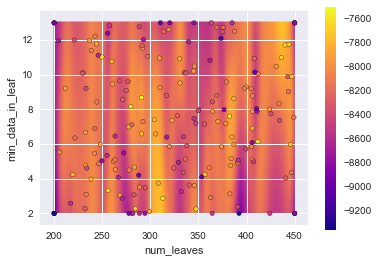

In [10]:
graphBO("num_leaves", "min_data_in_leaf", num_leaves_min, num_leaves_max, min_data_in_leaf_min, min_data_in_leaf_max, 18)

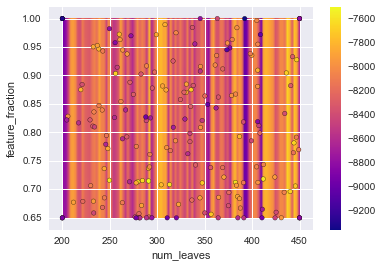

In [11]:
graphBO("num_leaves", "feature_fraction", num_leaves_min, num_leaves_max, feature_fraction_min, feature_fraction_max, 600)

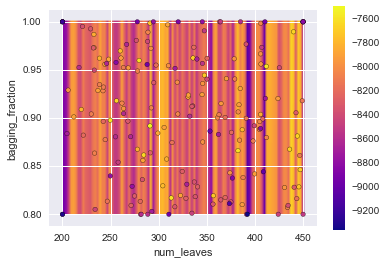

In [12]:
graphBO("num_leaves", "bagging_fraction", num_leaves_min, num_leaves_max, bagging_fraction_min, bagging_fraction_max, 1000)

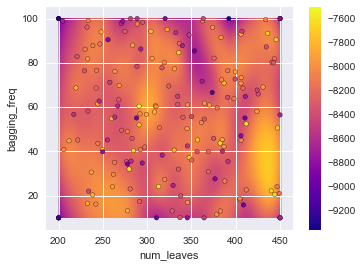

In [31]:
graphBO("num_leaves", "bagging_freq", num_leaves_min, num_leaves_max, bagging_freq_min, bagging_freq_max, 2.5)

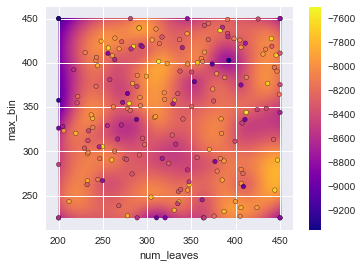

In [14]:
graphBO("num_leaves", "max_bin", num_leaves_min, num_leaves_max, max_bin_min, max_bin_max, 1)

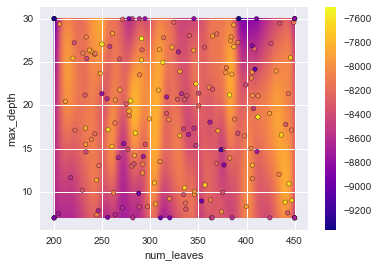

In [32]:
graphBO("num_leaves", "max_depth", num_leaves_min, num_leaves_max, max_depth_min, max_depth_max, 9)

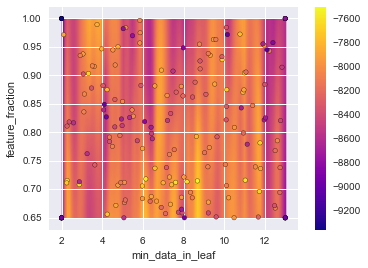

In [33]:
graphBO("min_data_in_leaf", "feature_fraction", min_data_in_leaf_min, min_data_in_leaf_max, feature_fraction_min, feature_fraction_max, 28)

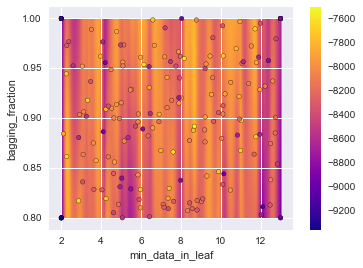

In [34]:
graphBO("min_data_in_leaf", "bagging_fraction", min_data_in_leaf_min, min_data_in_leaf_max, bagging_fraction_min, bagging_fraction_max, 50)

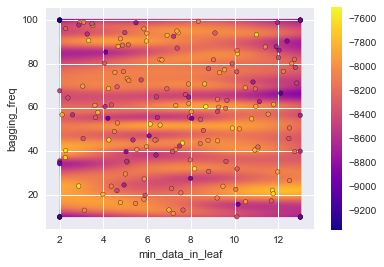

In [35]:
graphBO("min_data_in_leaf", "bagging_freq", min_data_in_leaf_min, min_data_in_leaf_max, bagging_freq_min, bagging_freq_max, 0.1)

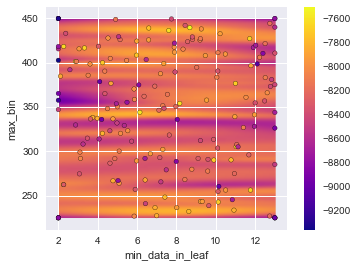

In [38]:
graphBO("min_data_in_leaf", "max_bin", min_data_in_leaf_min, min_data_in_leaf_max, max_bin_min, max_bin_max, 0.045)

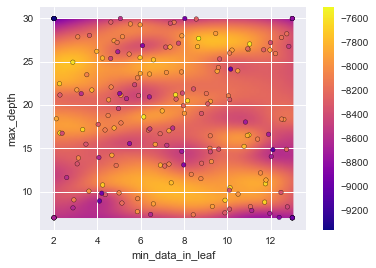

In [39]:
graphBO("min_data_in_leaf", "max_depth", min_data_in_leaf_min, min_data_in_leaf_max, max_depth_min, max_depth_max, 0.4)

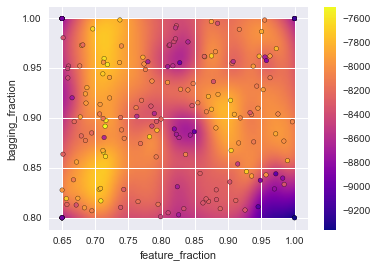

In [40]:
graphBO("feature_fraction", "bagging_fraction", feature_fraction_min, feature_fraction_max, bagging_fraction_min, bagging_fraction_max, 1.5)

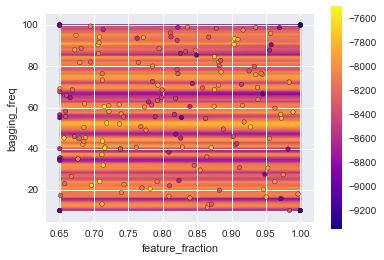

In [22]:
graphBO("feature_fraction", "bagging_freq", feature_fraction_min, feature_fraction_max, bagging_freq_min, bagging_freq_max, 0.003)

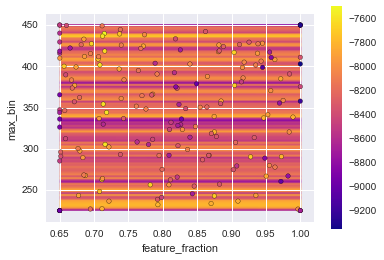

In [23]:
graphBO("feature_fraction", "max_bin", feature_fraction_min, feature_fraction_max, max_bin_min, max_bin_max, 0.0012)

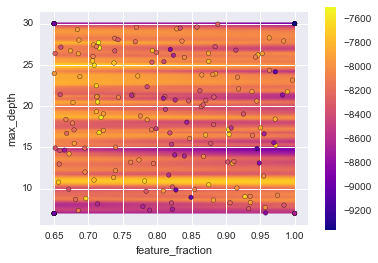

In [41]:
graphBO("feature_fraction", "max_depth", feature_fraction_min, feature_fraction_max, max_depth_min, max_depth_max, 0.012)

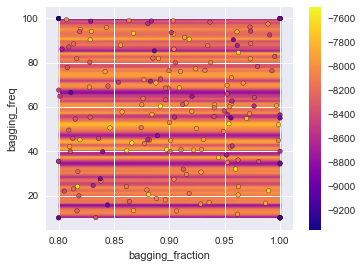

In [25]:
graphBO("bagging_fraction", "bagging_freq", bagging_fraction_min, bagging_fraction_max, bagging_freq_min, bagging_freq_max, 0.002)

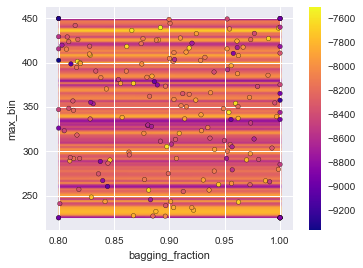

In [26]:
graphBO("bagging_fraction", "max_bin", bagging_fraction_min, bagging_fraction_max, max_bin_min, max_bin_max, 0.0008)

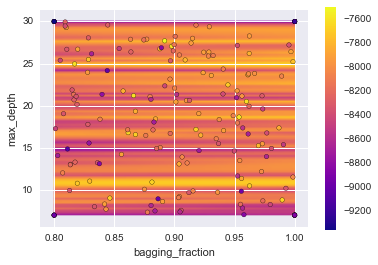

In [42]:
graphBO("bagging_fraction", "max_depth", bagging_fraction_min, bagging_fraction_max, max_depth_min, max_depth_max, 0.007)

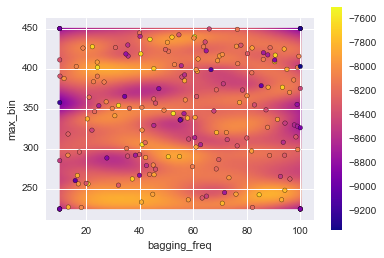

In [43]:
graphBO("bagging_freq", "max_bin", bagging_freq_min, bagging_freq_max, max_bin_min, max_bin_max, 0.3)

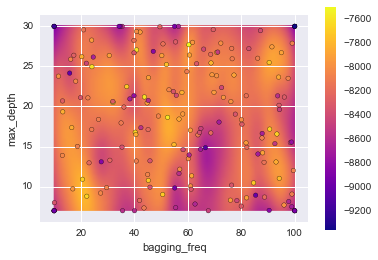

In [29]:
graphBO("bagging_freq", "max_depth", bagging_freq_min, bagging_freq_max, max_depth_min, max_depth_max, 3)

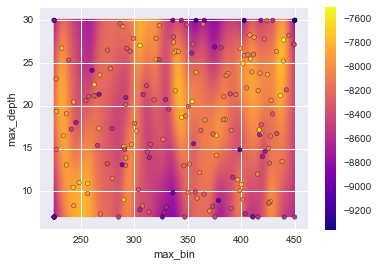

In [45]:
graphBO("max_bin", "max_depth", max_bin_min, max_bin_max, max_depth_min, max_depth_max, 8)